In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import scipy.stats as ss
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec 


# modules for generating the word cloud
from os import path, getcwd
from wordcloud import WordCloud ,STOPWORDS
from wordcloud import WordCloud, ImageColorGenerator

from PIL import Image

import string
#NLP
from nltk.corpus import stopwords
stopwords = list(set(stopwords.words("english")))
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer 
import nltk
nltk.download('wordnet')

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [4]:
test=pd.read_csv("test.csv")

In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train["clean"]=(train.iloc[:,2:].sum(axis=1)==0)+0

In [7]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,1
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,1


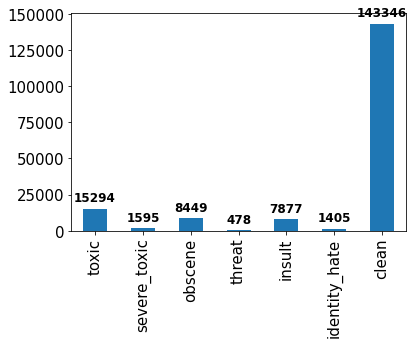

In [8]:
ax=train.iloc[:,2:].sum().plot(kind="bar")
ax.tick_params(labelsize=15)

pos = range(len(train.iloc[:,2:].sum()))
nobs = train.iloc[:,2:].sum().values

for tick,label in zip(pos,train.iloc[:,2:].sum().index):
    ax.text(pos[tick],  train.iloc[:,2:].sum().values[tick]+5000,nobs[tick], horizontalalignment='center', size='large', color='black', weight='semibold')


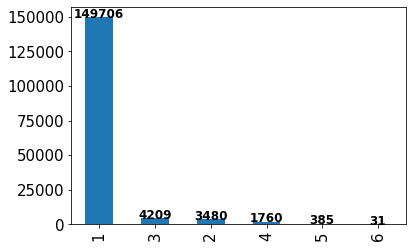

In [9]:
ax=train.iloc[:,2:].sum(axis=1).value_counts().plot(kind="bar")
ax.tick_params(labelsize=15)

pos = range(int(train.iloc[:,2:].sum(axis=1).max()))
nobs = train.iloc[:,2:].sum(axis=1).value_counts().values

for tick,label in zip(pos,train.iloc[:,2:].sum(axis=1).value_counts().index):
    ax.text(pos[tick],  train.iloc[:,2:].sum(axis=1).value_counts().values[tick],nobs[tick], horizontalalignment='center', size='large', color='black', weight='semibold')


In [10]:
train.iloc[:,2:].columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'clean'],
      dtype='object')

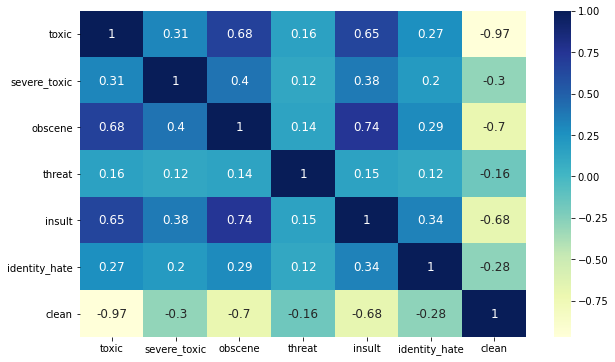

In [11]:
import matplotlib.pyplot as plt

corr=train.iloc[:,2:].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,annot_kws={"fontsize":12}, cmap="YlGnBu")

Pandas's default Corr function which uses Pearson correlation does not apply here, since the variables invovled are Categorical (binary) variables.

\
Pearson correlation is a means of quantifying how much the mean and expectation for two variables change simultaneously, if at all. In other words, pearson correlation measures if two variables are moving together, and to what degree,in binary variables, we cant say directly, whether they are moving together or not.

\
So, to find a pattern between two categorical variables we can use other tools like

Confusion matrix/Crosstab,\
Cramer's V Statistic,\
Cramer's V stat is an extension of the chi-square test where the extent/strength of association is also measured\

instead of calculating correlation, we calculate resemblance (similarity) coefficients (simple matching (SM), Dice, Jaccard etc.)

https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab

## CROSSTAB AND CRAMERS V STATISTIC

In [12]:
temp_df=train.iloc[:,2:-1]

main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

In [13]:
# ref : https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [14]:
def matrix_of_cramer_statistic(df,list_of_columns):
    matrix=[[0 for i in range(0,len(list_of_columns))] for i in range(len(list_of_columns))]
    for i in range(len(list_of_columns)):
        for j in range(len(list_of_columns)):
            matrix[i][j]= (cramers_corrected_stat(pd.crosstab(df[list_of_columns[i]], df[list_of_columns[j]])))
    cm = sns.light_palette("#2ecc71", as_cmap=True)
    return pd.DataFrame(matrix, columns = list_of_columns).set_index(list_of_columns).style.background_gradient(cmap=cm,axis=1)

In [15]:
matrix_of_cramer_statistic(train,train.iloc[:,2:].columns)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
toxic,0.999964,0.308503,0.676464,0.156844,0.647466,0.265884,0.967713
severe_toxic,0.308503,0.999683,0.402867,0.123000,0.375655,0.201248,0.298552
obscene,0.676464,0.402867,0.999938,0.140901,0.741206,0.286707,0.702764
threat,0.156844,0.123000,0.140901,0.998951,0.149737,0.114488,0.162717
insult,0.647466,0.375655,0.741206,0.149737,0.999933,0.337573,0.677274
identity_hate,0.265884,0.201248,0.286707,0.114488,0.337573,0.999641,0.280023
clean,0.967713,0.298552,0.702764,0.162717,0.677274,0.280023,0.999966


## EXAMPLE COMMENTS

In [16]:
print(train[train.severe_toxic==1].iloc[9,1])

WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.


In [17]:
print(train[train.obscene==1].iloc[9,1])

I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


In [18]:
print(train[train.identity_hate==1].iloc[9,1])

WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.


## WORD CLOUD

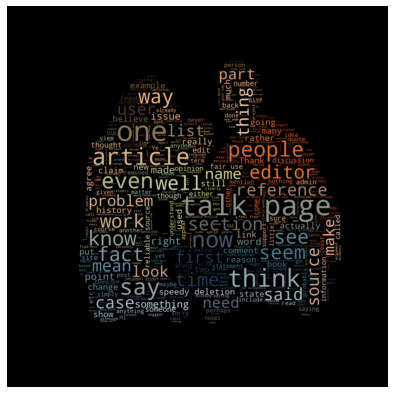

In [19]:
#clean comments
clean_mask=np.array(Image.open("C:/Users/ramya/Desktop/Santa Clara University/Projects/Toxic comments/clean.png"))

#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
wc = WordCloud(background_color="black", max_words=500, mask=clean_mask,
               max_font_size=90, random_state=42)

wc.generate(" ".join(text))

image_colors = ImageColorGenerator(clean_mask)
plt.figure(figsize=[9,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

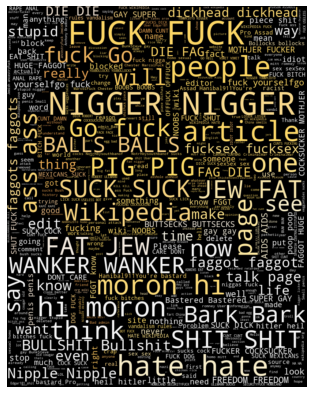

In [20]:
#clean comments
clean_mask=np.array(Image.open("C:/Users/ramya/Desktop/Santa Clara University/Projects/Toxic comments/toxic.png"))

#wordcloud for clean comments
subset=train[train.toxic==True]
text=subset.comment_text.values
wc = WordCloud(background_color="black", max_words=500, mask=clean_mask,
               max_font_size=90, random_state=42)

wc.generate(" ".join(text))

image_colors = ImageColorGenerator(clean_mask)
plt.figure(figsize=[9,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## FEATURE ENGINEERING

In [21]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,1
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,1


In [22]:
merge=pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df=merge.reset_index(drop=True)

In [23]:
df.head()

,id,comment_text
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?"


In [24]:
## Indirect features

#Sentense count in each comment:

#  '\n' can be used to count the number of sentences in each comment
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))

#punctuation count
df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
#istitle() method returns True if all words in a text start with a upper case letter, 
#AND the rest of the word are lower case letters, otherwise False.Symbols and numbers are ignored.
df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

#Average length of the words
df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [25]:
#derived features
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
#derived features
#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']

In [26]:
df.tail()

,id,comment_text,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
312730,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing but too-long-crap",2,10,10,60,4,0,0,4,4.900000,100.000000,40.000000
312731,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n Does it get there faster by throwing to cut off man or direct from out fielder? \n Were the out fielders in the Mickey mantle era have better arms? \n Rich,5,38,32,198,7,0,5,18,4.052632,84.210526,18.421053
312732,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is """"more correct."""" I had gotten confused, but then found this: \n :... while acknowledging Japan's territorial rights to Okinotorishima itself ... \n However, is there a category for \n :... did not acknowledge Japan's claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for """"disputed EEZ""""s? """,9,64,51,423,36,3,7,26,5.343750,79.687500,56.250000
312733,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the EU - Germany - has a Law of Return quite similar to Israel's"""" == \n\n This isn't actually true, is it? Germany allows people whose ancestors were citizens of Germany to return, but AFAIK it does not allow the descendants of Anglo-Saxons to """"return"""" to Angeln and Saxony. Israel, by contrast, allows all Jews to """"return"""" to Israel, even if they can't trace a particular ancestral line to anyone who lived in the modern state or even mandate Palestine. — """,5,89,66,502,32,2,14,35,4.584270,74.157303,35.955056
312734,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not welcome here. I'm no fool, and if you think that kind of explination is enough, well pity you. """,2,26,24,141,11,0,2,10,4.269231,92.307692,42.307692


In [27]:
len(df)

312735

In [28]:
#seperate train and test features

train_feats=df.iloc[0:len(train),]
test_feats=df.iloc[len(train):,]

#join the tags
train_tags=train.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)


In [29]:
train_feats.head(3)

,id,comment_text,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",2,43,41,264,10,2,11,18,5.162791,95.348837,23.255814,0,0,0,0,0,0,1
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",1,17,17,112,12,1,3,2,5.588235,100.000000,70.588235,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",1,42,39,233,6,0,2,20,4.571429,92.857143,14.285714,0,0,0,0,0,0,1


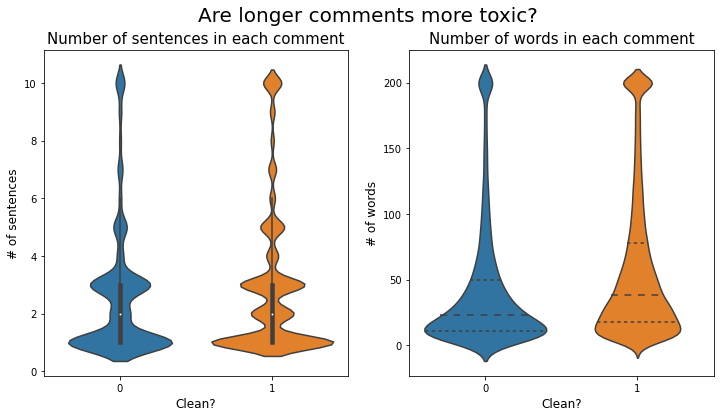

In [30]:
train_feats['count_sent'].loc[train_feats['count_sent']>10] = 10 
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train_feats,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
train_feats['count_word'].loc[train_feats['count_word']>200] = 200
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train_feats,split=True,inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

In [31]:
train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200
## SPLIT VIOLIN PLOTS

temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')
#spammers - comments with less than 40% unique words
spammers=train_feats[train_feats['word_unique_percent']<30]

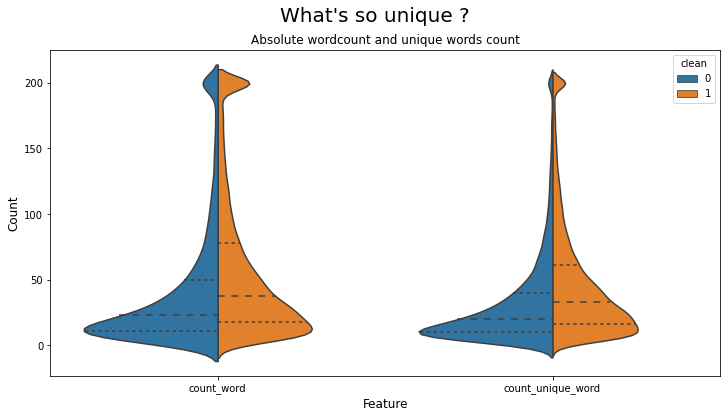

In [32]:
plt.figure(figsize=(12,6))
plt.suptitle("What's so unique ?",fontsize=20)

sns.violinplot(x='variable', y='value', hue='clean', data=temp_df,split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# plt.subplot(122)

Text(0.5, 0, 'Percent unique words')

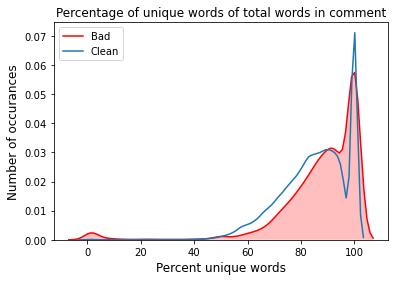

In [33]:
plt.title("Percentage of unique words of total words in comment")
ax=sns.kdeplot(train_feats[train_feats.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train_feats[train_feats.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)

Word count VS unique word count:
There are noticeable shifts in the mean of both word count and unique word count across clean and toxic comments.

Chart desc: The first chart is a split violin chart. It is a variation of the traditional box chart/violin chart which allows us to split the violin in the middle based on a categorical variable.
Unique word count percent:
There is a bulge near the 0-10% mark which indicates a large number of toxic comments which contain very little variety of words.

Chart desc: The second chart is an overlay of two kernel density estimation plots of percentage of unique words out of all the words in the comment, done for both clean and toxic comments
Even though the number of clean comments dominates the dataset(~90%), there are only 75 clean comments that are spam, which makes it a powerful indicator of a toxic comment.

In [34]:
len(spammers[spammers.clean==0])

343

In [35]:
len(spammers[spammers.clean==1])

128

## TEXT CLEANING

In [36]:
APPO = {"aren't" : "are not", "can't" : "cannot","couldn't" : "could not","didn't" : "did not","doesn't" : "does not",
"don't" : "do not","hadn't" : "had not","hasn't" : "has not","haven't" : "have not","he'd" : "he would","he'll" : "he will",
"he's" : "he is","i'd" : "I would","i'd" : "I had","i'll" : "I will","i'm" : "I am","isn't" : "is not","it's" : "it is","it'll":"it will","i've" : "I have",
"let's" : "let us","mightn't" : "might not","mustn't" : "must not","shan't" : "shall not","she'd" : "she would","she'll" : "she will","she's" : "she is","shouldn't" : "should not",
"that's" : "that is","there's" : "there is","they'd" : "they would","they'll" : "they will","they're" : "they are","they've" : "they have","we'd" : "we would","we're" : "we are","weren't" : "were not",
"we've" : "we have","what'll" : "what will","what're" : "what are","what's" : "what is","what've" : "what have","where's" : "where is",
"who'd" : "who would","who'll" : "who will","who're" : "who are","who's" : "who is","who've" : "who have","won't" : "will not","wouldn't" : "would not","you'd" : "you would",
"you'll" : "you will","you're" : "you are","you've" : "you have","'re": " are","wasn't": "was not","we'll":" will","didn't": "did not",
"tryin'":"trying"}

In [37]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [38]:
corpus=merge.comment_text

In [39]:
len(corpus)

312735

In [40]:
clean_corpus=corpus.apply(lambda x :clean(x))

## LEARNING MODELLING WITH EXAMPLES

### countvectoriser Unigram and Bigram

In [41]:
#ref https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle
#ref https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e
#ref https://kavita-ganesan.com/how-to-use-countvectorizer/#.Xx-WYJ5Kiow

sample_text = ["One one of the most basic ways we can numerically represent words ",
               "is through the one-hot encoding method (also sometimes called ",
               "count vectorizing)."]

In [42]:
vectorizer = CountVectorizer(stop_words=stopwords)
vectorizer.fit(sample_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=["you'd", 'by', 'if', 'here', 'aren', 'what', 'he', 't', 'hers', 'don', 'me', "wouldn't", 'which', 'during', "needn't", "it's", 'those', 'she', 'a', 'then', 'there', 'will', 'ours', 'when', 'very', 'did', 'themselves', 'our', "that'll", 'as', 'ourselves', 'were', 'under', "won't", 'am', '...w', 've', 'while', 'myself', 'few', 'more', 'mustn', "wasn't", 'about', 'yourself', 'had', 'itself'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [43]:
vector=vectorizer.transform(sample_text)
vector.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [44]:
vectorizer.get_feature_names()

['also',
 'basic',
 'called',
 'count',
 'encoding',
 'hot',
 'method',
 'numerically',
 'one',
 'represent',
 'sometimes',
 'vectorizing',
 'ways',
 'words']

In [45]:
# only bigrams, word level
cv = CountVectorizer(sample_text,ngram_range=(2,2))
count_vector=cv.fit_transform(sample_text)

In [46]:
cv.get_feature_names()

['also sometimes',
 'basic ways',
 'can numerically',
 'count vectorizing',
 'encoding method',
 'hot encoding',
 'is through',
 'method also',
 'most basic',
 'numerically represent',
 'of the',
 'one hot',
 'one of',
 'one one',
 'represent words',
 'sometimes called',
 'the most',
 'the one',
 'through the',
 'ways we',
 'we can']

In [47]:
count_vector.toarray()

array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

### TfidfTransformer bigram from countvectorizer

In [48]:
#ref https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#Tfidfvectorizer-Usage

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count_vector.toarray())

In [49]:
Doc_Term_Matrix = pd.DataFrame(tfidf.toarray(),columns=cv.get_feature_names())
Doc_Term_Matrix

,also sometimes,basic ways,can numerically,count vectorizing,encoding method,hot encoding,is through,method also,most basic,numerically represent,...,one hot,one of,one one,represent words,sometimes called,the most,the one,through the,ways we,we can
0,0.000000,0.301511,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.301511,0.301511,...,0.000000,0.301511,0.301511,0.301511,0.000000,0.301511,0.000000,0.000000,0.301511,0.301511
1,0.333333,0.000000,0.000000,0.0,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000
2,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### TfidfTransformer Unigram from countvectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vector.toarray())
Doc_Term_Matrix = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names())
Doc_Term_Matrix

,also,basic,called,count,encoding,hot,method,numerically,one,represent,sometimes,vectorizing,ways,words
0,0.000000,0.369772,0.000000,0.000000,0.000000,0.000000,0.000000,0.369772,0.562443,0.369772,0.000000,0.000000,0.369772,0.369772
1,0.389888,0.000000,0.389888,0.000000,0.389888,0.389888,0.389888,0.000000,0.296520,0.000000,0.389888,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000


### HashingVectorizer

In [51]:
#ref https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#.XyBxzJ5KhUs
#Compute raw counts using hashing vectorizer 
# Small numbers of n_features can cause hash collisions 

hvectorizer = HashingVectorizer(n_features=30,alternate_sign=False,stop_words=stopwords,norm="l1" ) 

# compute counts without any term frequency normalization 
X = hvectorizer.transform(sample_text)


In [52]:
X.toarray()

array([[0.        , 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.42857143,
        0.14285714, 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14285714, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28571429,
        0.        , 0.        , 0.28571429, 0.14285714, 0.        ,
        0.        , 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.

In [53]:
hvectorizer._get_hasher

<bound method HashingVectorizer._get_hasher of HashingVectorizer(alternate_sign=False, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True, n_features=30,
         ngram_range=(1, 1), non_negative=False, norm='l1',
         preprocessor=None,
         stop_words=["you'd", 'by', 'if', 'here', 'aren', 'what', 'he', 't', 'hers', 'don', 'me', "wouldn't", 'which', 'during', "needn't", "it's", 'those', 'she', 'a', 'then', 'there', 'will', 'ours', 'when', 'very', 'did', 'themselves', 'our', "that'll", 'as', 'ourselves', 'were', 'under', "won't", 'am', '...w', 've', 'while', 'myself', 'few', 'more', 'mustn', "wasn't", 'about', 'yourself', 'had', 'itself'],
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None)>

### TfidfVectorizer Bigram from countvectorizer

In [54]:
tfv = TfidfVectorizer(min_df=1,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(2, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = stopwords)
X = tfv.fit_transform(sample_text)
pd.DataFrame(X.toarray(),columns=tfv
             .get_feature_names())

,also sometimes,basic ways,count vectorizing,encoding method,hot encoding,method also,numerically represent,one basic,one hot,one one,represent words,sometimes called,ways numerically
0,0.000000,0.408248,0.0,0.000000,0.000000,0.000000,0.408248,0.408248,0.000000,0.408248,0.408248,0.000000,0.408248
1,0.408248,0.000000,0.0,0.408248,0.408248,0.408248,0.000000,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### TfidfVectorizer Unigram from countvectorizer

In [55]:
tfv = TfidfVectorizer(min_df=1,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = stopwords)
X = tfv.fit_transform(sample_text)
sample_data_tfidf=pd.DataFrame(X.toarray(),columns=tfv
             .get_feature_names())

In [56]:
sample_data_tfidf

,also,basic,called,count,encoding,hot,method,numerically,one,represent,sometimes,vectorizing,ways,words
0,0.000000,0.387547,0.000000,0.000000,0.000000,0.000000,0.000000,0.387547,0.499037,0.387547,0.000000,0.000000,0.387547,0.387547
1,0.389888,0.000000,0.389888,0.000000,0.389888,0.389888,0.389888,0.000000,0.296520,0.000000,0.389888,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000


In [57]:
#we create a function that takes a single row of the tf-idf matrix (corresponding to a particular document), 
#and return the n highest scoring words (or more generally tokens or features)

def top_tfidf_feats(row, features, top_n=5):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

#Here we use argsort to produce the indices that would order the row by tf-idf value, 
#reverse them (into descending order), and select the first top_n. We then return a pandas 
#DataFrame with the words themselves (feature names) and their corresponding score.

In [58]:
top_tfidf_feats(sample_data_tfidf.iloc[0],tfv
             .get_feature_names(),)

,feature,tfidf
0,one,0.499037
1,words,0.387547
2,ways,0.387547
3,represent,0.387547
4,numerically,0.387547


In [59]:
#We then calculate the mean of each column across the selected rows, which results in a single row of tf-idf values

def top_mean_feats(Xtr, features,  min_tfidf=0.1, top_n=10):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [60]:
top_mean_feats(X,tfv
             .get_feature_names())

,feature,tfidf
0,one,0.265186
1,vectorizing,0.235702
2,count,0.235702
3,sometimes,0.129963
4,method,0.129963
5,hot,0.129963
6,encoding,0.129963
7,called,0.129963
8,also,0.129963
9,words,0.129182


## EDA WITH REAL DATA

### Tfidf Unigram

In [84]:
tfv = TfidfVectorizer(min_df=200,  max_features=10000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,1),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names())

train_unigrams =  tfv.transform(clean_corpus.iloc[:train.shape[0]])
test_unigrams = tfv.transform(clean_corpus.iloc[train.shape[0]:])

In [85]:
def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [86]:
def plotting_all_top_tfidfs(Xtr, features, ids, min_tfidf=0.1, top_n=10):
    sns.set(font_scale=2) 
    fig, axes = plt.subplots(4, 2, figsize=(25, 25))
    axes = axes.flatten()
    for i,j in zip(train_tags.columns,axes):
        
        df=top_mean_feats(Xtr, features, train_tags.index[train_tags[i]==1], min_tfidf=0.1, top_n=10)
        sns.barplot(x="feature",y="tfidf",data=df,ax=j)
        
        j.set_title(i)
        j.tick_params(labelrotation=45)
    plt.subplots_adjust(hspace = 0.5)

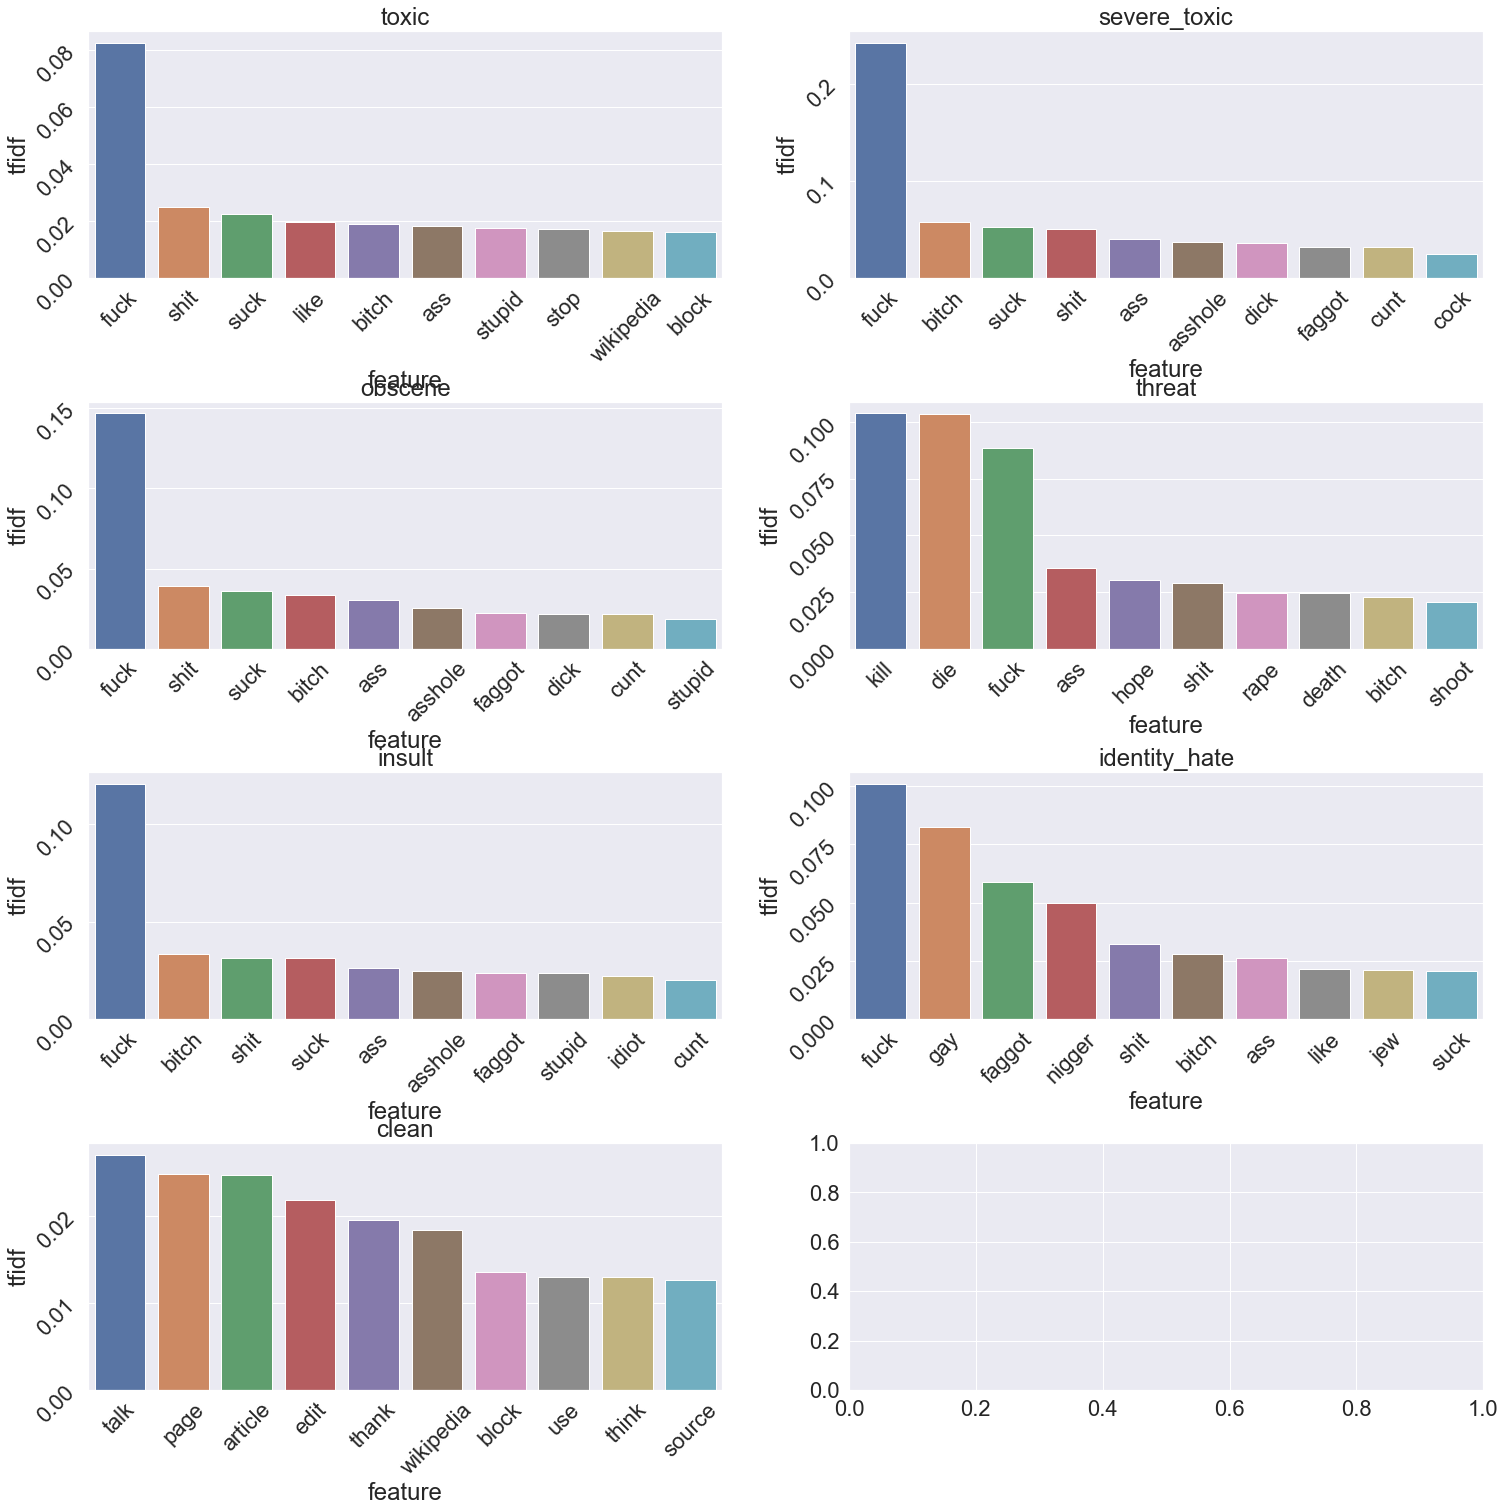

In [87]:
plotting_all_top_tfidfs(train_unigrams,features, train_tags.columns, min_tfidf=0.1, top_n=10)

### Tfidf Bigram

In [88]:
tfv = TfidfVectorizer(min_df=150,  max_features=20000, 
            strip_accents='unicode', analyzer='word',ngram_range=(2,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names())

train_bigrams =  tfv.transform(clean_corpus.iloc[:train.shape[0]])
test_bigrams = tfv.transform(clean_corpus.iloc[train.shape[0]:])

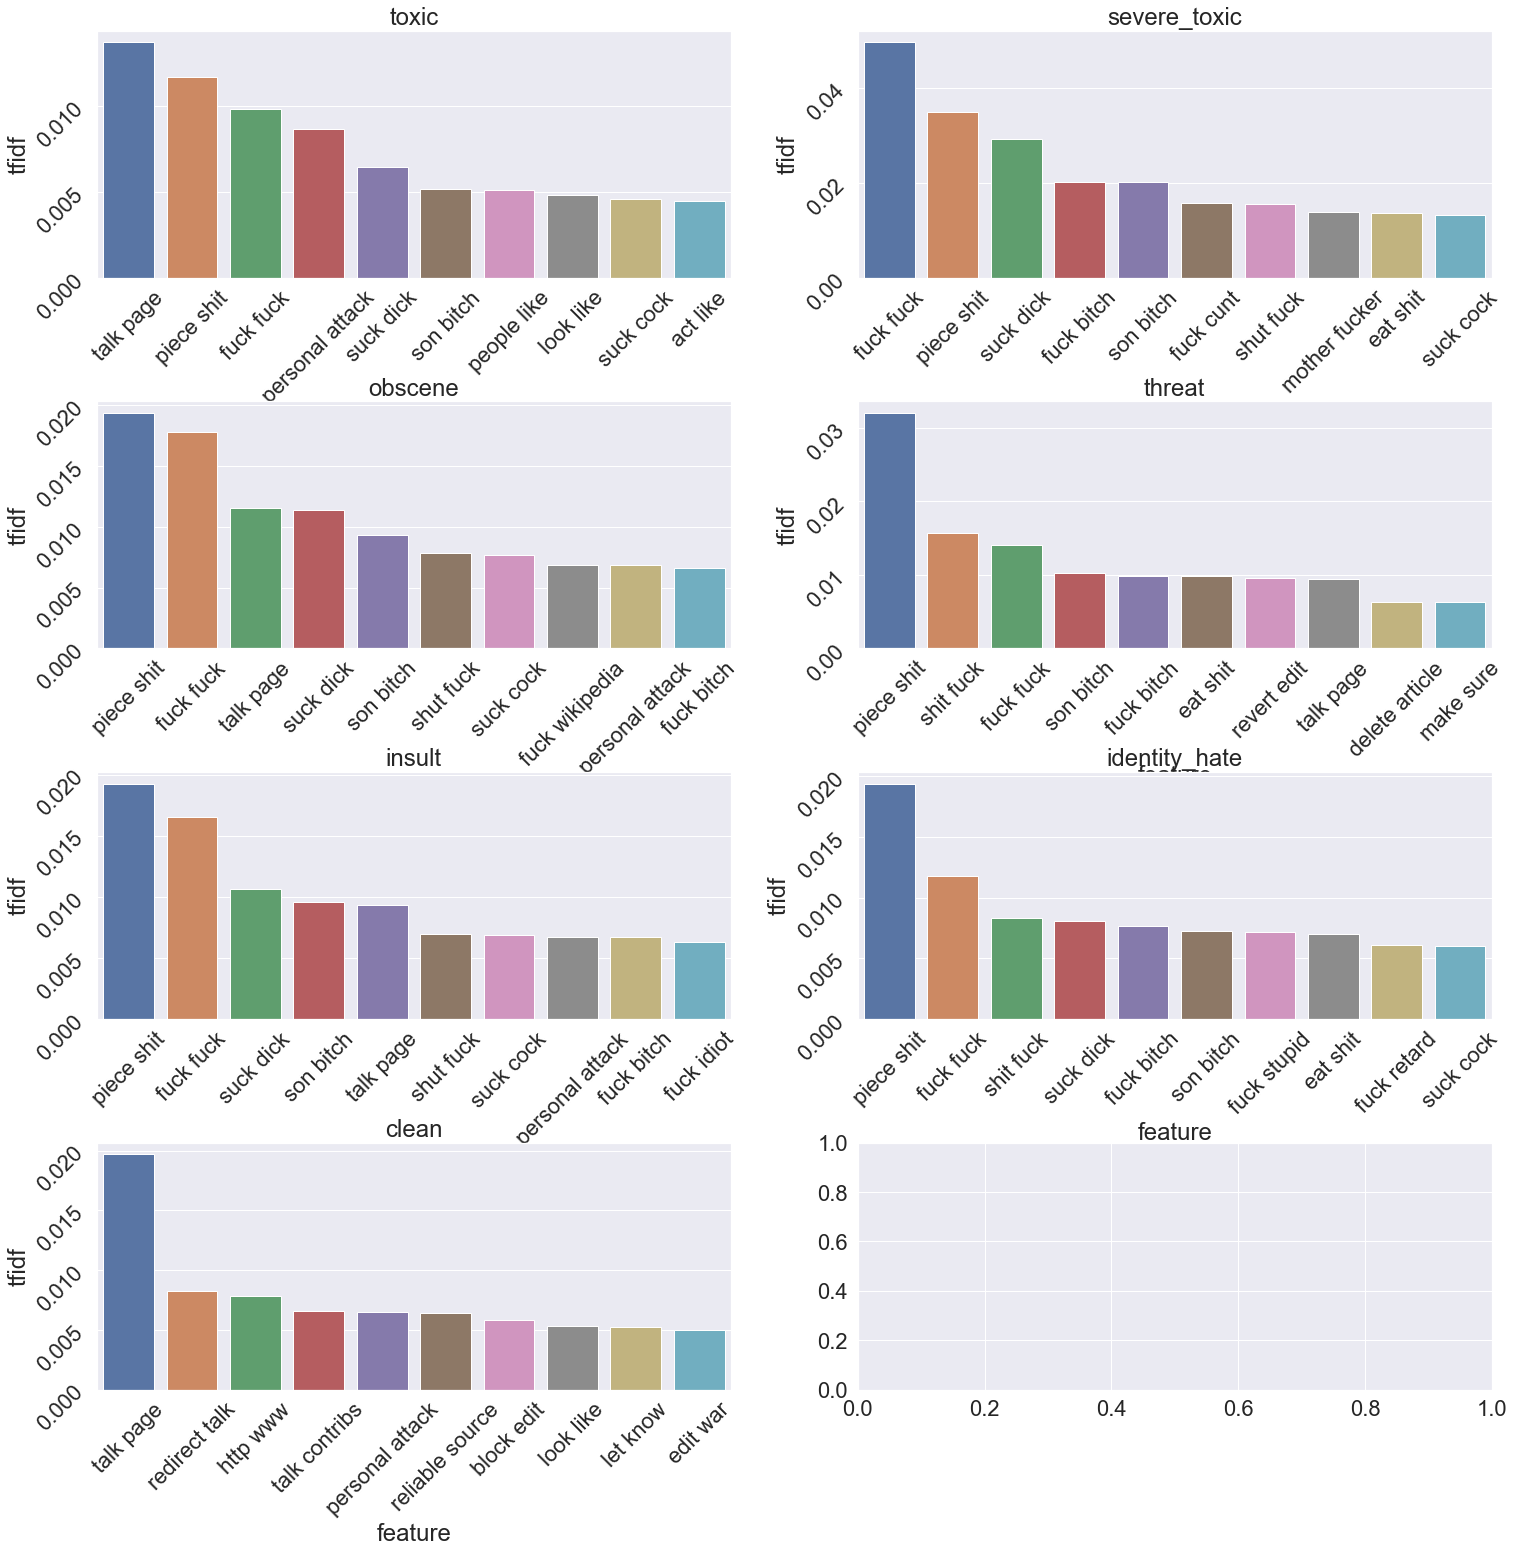

In [89]:
plotting_all_top_tfidfs(train_bigrams,features, train_tags.columns, min_tfidf=0.1, top_n=10)

In [90]:
train_bigrams.shape

(159571, 2341)

In [97]:
type(train_bigrams)

scipy.sparse.csr.csr_matrix

In [91]:
train_unigrams.shape

(159571, 3914)

In [100]:
test_bigrams.shape

(153164, 2341)

# ML MODELLING

In [98]:
cols_target=train_tags.columns

In [99]:
train_tags.shape

(159571, 7)

In [92]:
# Fitting a simple Logistic Regression on TFIDF

logreg = LogisticRegression(C=12.0)

clf = LogisticRegression(C=1.0)


clf.fit(train_bigrams, ytrain)
predictions = clf.predict_proba(xvalid_tfv)

In [118]:
submission_binary = pd.read_csv('sample_submission.csv')

### Logistic Regression USING BIGRAMS

In [119]:
for label in cols_target[:-1]:
    print('... Processing {}'.format(label))
    y = train_tags[label]
    # train the model using X_dtm & y
    logreg.fit(train_bigrams, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(train_bigrams)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_bigrams)[:,1]
    submission_binary[label] = test_y_prob

... Processing toxic
Training accuracy is 0.912947841399753
... Processing severe_toxic
Training accuracy is 0.9901736531073942
... Processing obscene
Training accuracy is 0.954653414467541
... Processing threat
Training accuracy is 0.9970044682304429
... Processing insult
Training accuracy is 0.9561699807609152
... Processing identity_hate
Training accuracy is 0.9911826083686885


In [120]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.139172,0.012824,0.075160,0.004031,0.070211,0.012758
1,0000247867823ef7,0.139172,0.012824,0.075160,0.004031,0.070211,0.012758
2,00013b17ad220c46,0.139172,0.012824,0.075160,0.004031,0.070211,0.012758
3,00017563c3f7919a,0.022410,0.000809,0.001290,0.000744,0.001321,0.000607
4,00017695ad8997eb,0.125107,0.006285,0.055907,0.000567,0.062322,0.003344


### Logistic Regression USING UNIGRAMS

In [121]:
for label in cols_target[:-1]:
    print('... Processing {}'.format(label))
    y = train_tags[label]
    # train the model using X_dtm & y
    logreg.fit(train_unigrams, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(train_unigrams)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_unigrams)[:,1]
    submission_binary[label] = test_y_prob

... Processing toxic
Training accuracy is 0.9633078692243578
... Processing severe_toxic
Training accuracy is 0.9916651521893076
... Processing obscene
Training accuracy is 0.9826973572892318
... Processing threat
Training accuracy is 0.9979068878430292
... Processing insult
Training accuracy is 0.9747009168332592
... Processing identity_hate
Training accuracy is 0.9937394639376829


In [122]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999964,0.455653,0.999875,0.044883,0.978527,0.733488
1,0000247867823ef7,0.001408,0.000425,0.000311,0.000319,0.002135,0.000611
2,00013b17ad220c46,0.004919,0.000264,0.002102,0.000005,0.002157,0.000049
3,00017563c3f7919a,0.001289,0.002592,0.001136,0.000103,0.001351,0.000037
4,00017695ad8997eb,0.005782,0.000206,0.000835,0.000097,0.002717,0.000083


In [123]:
# Clearly Unigrams have done a better job than Bigrams

### Naive Bayes on UNIGRAMS

In [125]:
# Fitting a simple Naive Bayes on TFIDF
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

In [128]:
for label in cols_target[:-1]:
    print('... Processing {}'.format(label))
    y = train_tags[label]
    # train the model using X_dtm & y
    clf.fit(train_unigrams, y)
    # compute the training accuracy
    y_pred_X = clf.predict(train_unigrams)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = clf.predict_proba(test_unigrams)[:,1]
    submission_binary[label] = test_y_prob

... Processing toxic
Training accuracy is 0.9502227848418572
... Processing severe_toxic
Training accuracy is 0.990612329307957
... Processing obscene
Training accuracy is 0.973629293543313
... Processing threat
Training accuracy is 0.9969982014275777
... Processing insult
Training accuracy is 0.9688915905772352
... Processing identity_hate
Training accuracy is 0.9918594230781282


In [129]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.998308,0.657171,0.994521,0.042430,0.986592,0.628448
1,0000247867823ef7,0.016952,0.002195,0.008054,0.001136,0.007773,0.002433
2,00013b17ad220c46,0.032106,0.001079,0.014946,0.000153,0.012585,0.000908
3,00017563c3f7919a,0.012890,0.000382,0.004730,0.000064,0.004733,0.000223
4,00017695ad8997eb,0.043018,0.000968,0.019363,0.000155,0.016639,0.000749
